In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
    

In [3]:
df_PK = df[df['job_country']=='Pakistan'].copy()


In [4]:
df_PK['job_posted_month'] = df_PK['job_posted_date'].dt.strftime('%B')
df_PK_pivot = df_PK.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [5]:
df_PK_pivot.reset_index(inplace=True)
df_PK_pivot['month_no'] = pd.to_datetime(df_PK_pivot['job_posted_month'], format='%B').dt.month
df_PK_pivot.sort_values('month_no',inplace=True)
df_PK_pivot.set_index('job_posted_month', inplace=True)
df_PK_pivot.drop(columns='month_no', inplace=True)
df_PK_pivot


job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,12,5,39,89,65,14,6,16,14,35
February,10,5,19,45,28,9,3,17,11,28
March,13,2,26,65,33,14,5,13,15,21
April,7,2,22,39,15,6,1,13,8,7
May,3,1,12,47,22,19,1,10,4,6
June,10,5,15,46,33,12,2,7,2,12
July,6,3,18,50,23,22,1,15,7,26
August,7,5,21,44,16,11,1,7,13,32
September,9,4,27,47,29,26,3,14,8,27


In [8]:
df_PK_Software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')


In [16]:
df_PK_merged = df_PK_pivot.merge(df_PK_Software_pivot, on='job_posted_month')
top_5 = (
    df_PK_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index.to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

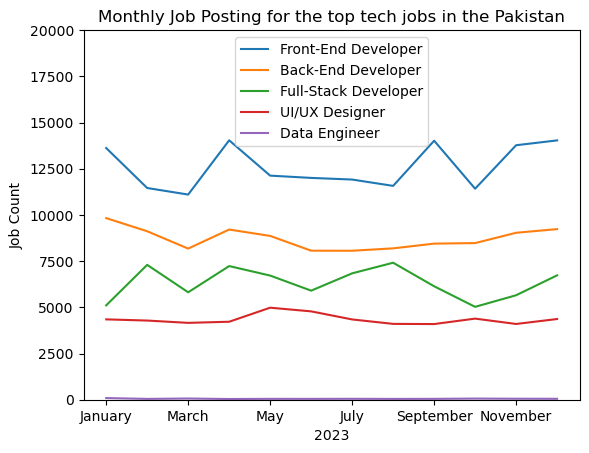

In [23]:
df_PK_merged[top_5].plot(kind='line')
plt.title("Monthly Job Posting for the top tech jobs in the Pakistan")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.ylim(0, 20000)
plt.legend()
plt.show()